### Summary
- Load in the `nonderiv_trans.csv` and `submission.csv`
- Select transaction code
    - Code E, H, I, L, O, and W are not related to an aquisition or disposition of shares
    - Reference: 
    - The most frequent transaction types were **S, A, M, P, and F**.
    - Code S and P directly indicate the **sale** and **purchase** of security. 
    - Code A, C, G, M, X, and Z can be considered as 'buy' transactions.
    - Code D, F, S, and U can be considered as 'sell' transactions.
    - Code J transactions are excluded in this analysis due to its ambiguity.
    - **TRANS_ACQUIRED_DISP_CD** might specify the type of code J transactions.
- Choose the target companies: : __Google, Meta, ILLUMINA INC, ZoomInfo Technologies Inc., Amazon__
    - The SEC dataset provides both of the number of occurrence and the value of transactions happened inside of a company.
    - **The number of transactions** will account for a high level of insider trading activity of a company to ensure the sufficient data for the analysis.
    - **NASDAQ 100** will account for a high volume of insider transactions
    - NASDAQ 100 Technology Sector Index (NDXT) will be another independant variable
    - Technology companies listed on the Nasdaq-100 will be target companies
    - NASDAQ 100 doesn't directly explain the insider transaction activities.
    - We assume that NASDAQ 100 explains the company's large volume (100 companies with highest performance) therefore observable volume of insider trading activity
- Export datasets for each company:
    - `goog_trans.csv`, `meta_trans.csv`, `ilmn_trans.csv`, `zoom_trans.csv`, `amzn_trans.csv`

In [3]:
import pandas as pd

trans_df = pd.read_csv('data/nonderiv_trans.csv')
sub_df = pd.read_csv('data/submission.csv')

In [4]:
trans_df

,ACCESSION_NUMBER,TRANS_DATE,TRANS_CODE,TRANS_SHARES
0,0000076605-17-000122,2017-09-28,S,2000.00
1,0000076605-17-000122,2017-09-27,S,5000.00
2,0000076605-17-000121,2017-09-27,S,10000.00
3,0001140361-17-037034,2017-09-27,F,44043.00
4,0001140361-17-037033,2017-09-27,F,12303.00
...,...,...,...,...
6316217,0001144204-18-000035,2017-12-28,A,8150.00
6316218,0000899243-18-000006,2017-12-29,M,38800.00
6316219,0000899243-18-000005,2017-12-31,S,399892.03
6316220,0001062993-18-000002,2017-12-15,P,250000.00


In [5]:
trans_df['TRANS_DATE'].min()

'2006-01-01'

In [6]:
sub_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0001225208-17-013005,WATTS WATER TECHNOLOGIES INC,WTS
1,0001209191-17-046828,HOPE BANCORP INC,HOPE
2,0001144204-17-039257,Atlantic Coast Financial CORP,ACFC
3,0001140361-17-029277,"First Guaranty Bancshares, Inc.",FGBI
4,0001209191-17-046826,HOPE BANCORP INC,HOPE
...,...,...,...
3821572,0001562180-18-000541,SUN BANCORP INC /NJ/,SNBC
3821573,0001127602-18-003291,ERIE INDEMNITY CO,ERIE
3821574,0001692742-18-000012,STERICYCLE INC,SRCL
3821575,0001209191-18-006549,"Dova Pharmaceuticals, Inc.",DOVA


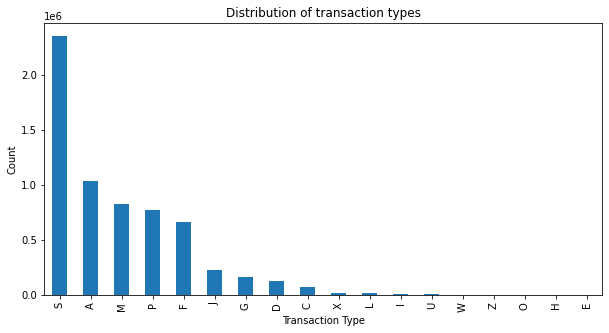

In [7]:
import matplotlib.pyplot as plt 

trans_df['TRANS_CODE'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of transaction types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [8]:
codes = ['A', 'C', 'G', 'M', 'P', 'Z', 'D', 'F', 'S']
trans_df = trans_df[trans_df['TRANS_CODE'].isin(codes)]
trans_df.reset_index(drop=True, inplace=True)
trans_df

,ACCESSION_NUMBER,TRANS_DATE,TRANS_CODE,TRANS_SHARES
0,0000076605-17-000122,2017-09-28,S,2000.00
1,0000076605-17-000122,2017-09-27,S,5000.00
2,0000076605-17-000121,2017-09-27,S,10000.00
3,0001140361-17-037034,2017-09-27,F,44043.00
4,0001140361-17-037033,2017-09-27,F,12303.00
...,...,...,...,...
6024901,0001144204-18-000035,2017-12-28,A,8150.00
6024902,0000899243-18-000006,2017-12-29,M,38800.00
6024903,0000899243-18-000005,2017-12-31,S,399892.03
6024904,0001062993-18-000002,2017-12-15,P,250000.00


In [9]:
merged_df = sub_df.merge(trans_df, on='ACCESSION_NUMBER')
merged_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
0,0001225208-17-013005,WATTS WATER TECHNOLOGIES INC,WTS,2017-03-21,A,5814.0
1,0001144204-17-039257,Atlantic Coast Financial CORP,ACFC,2017-07-28,A,600.0
2,0001140361-17-029277,"First Guaranty Bancshares, Inc.",FGBI,2017-07-24,A,51.0
3,0001209191-17-046675,AMERICAN SUPERCONDUCTOR CORP /DE/,AMSC,2017-07-27,A,225000.0
4,0001140361-17-029374,FIRST BUSEY CORP /NV/,BUSE,2017-07-28,A,243.0
...,...,...,...,...,...,...
6024901,0001562180-18-000517,SVB FINANCIAL GROUP,SIVB,2018-01-30,F,816.0
6024902,0001070412-18-000015,CNX Resources Corp,CNX,2018-01-30,A,7310.0
6024903,0001562180-18-000541,SUN BANCORP INC /NJ/,SNBC,2018-01-31,D,4255848.0
6024904,0001562180-18-000541,SUN BANCORP INC /NJ/,SNBC,2018-01-31,D,970.0


In [10]:
merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'FB']

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
2907,0001127602-17-026682,Facebook Inc,FB,2017-08-29,S,410.0
2908,0001127602-17-026682,Facebook Inc,FB,2017-08-29,S,267.0
2909,0001127602-17-026682,Facebook Inc,FB,2017-08-29,S,73.0
3143,0001127602-17-026681,Facebook Inc,FB,2017-08-25,S,25941.0
3144,0001127602-17-026681,Facebook Inc,FB,2017-08-25,S,11506.0
...,...,...,...,...,...,...
6003590,0001127602-18-010260,Facebook Inc,FB,2018-03-02,S,11072.0
6003591,0001127602-18-010260,Facebook Inc,FB,2018-03-02,S,300.0
6003592,0001127602-18-010260,Facebook Inc,FB,2018-03-02,S,11701.0
6003593,0001127602-18-010260,Facebook Inc,FB,2018-03-02,S,10220.0


In [11]:
merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'META']

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
121061,0000950103-22-016776,"Meta Platforms, Inc.",META,2022-09-27,S,342.0
123336,0000950103-22-013221,"Meta Platforms, Inc.",META,2022-07-26,S,342.0
127204,0000950103-22-014472,"Meta Platforms, Inc.",META,2022-08-23,S,342.0
129956,0000950103-22-016271,"Meta Platforms, Inc.",META,2022-09-20,S,342.0
132429,0000950103-22-012750,"Meta Platforms, Inc.",META,2022-07-19,S,342.0
...,...,...,...,...,...,...
3397216,0000950103-22-019524,"Meta Platforms, Inc.",META,2022-11-08,S,327.0
3399064,0000950103-22-020902,"Meta Platforms, Inc.",META,2022-12-07,S,342.0
3403553,0000950103-22-017484,"Meta Platforms, Inc.",META,2022-10-04,S,342.0
3411756,0000950103-22-019181,"Meta Platforms, Inc.",META,2022-11-01,S,342.0


In [12]:
merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'META']

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
121061,0000950103-22-016776,"Meta Platforms, Inc.",META,2022-09-27,S,342.0
123336,0000950103-22-013221,"Meta Platforms, Inc.",META,2022-07-26,S,342.0
127204,0000950103-22-014472,"Meta Platforms, Inc.",META,2022-08-23,S,342.0
129956,0000950103-22-016271,"Meta Platforms, Inc.",META,2022-09-20,S,342.0
132429,0000950103-22-012750,"Meta Platforms, Inc.",META,2022-07-19,S,342.0
...,...,...,...,...,...,...
3397216,0000950103-22-019524,"Meta Platforms, Inc.",META,2022-11-08,S,327.0
3399064,0000950103-22-020902,"Meta Platforms, Inc.",META,2022-12-07,S,342.0
3403553,0000950103-22-017484,"Meta Platforms, Inc.",META,2022-10-04,S,342.0
3411756,0000950103-22-019181,"Meta Platforms, Inc.",META,2022-11-01,S,342.0


In [13]:
merged_df['ISSUERNAME'] = merged_df['ISSUERNAME'].replace('Facebook Inc', 'Meta Platforms, Inc.')
merged_df['ISSUERTRADINGSYMBOL'] = merged_df['ISSUERTRADINGSYMBOL'].replace('FB', 'META')

In [14]:
merged_df[merged_df['ISSUERNAME'] == 'Google Inc.']

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
175560,0001127602-10-002360,Google Inc.,GOOG,2010-01-25,S,23.0
175561,0001127602-10-002360,Google Inc.,GOOG,2010-01-25,S,500.0
175562,0001127602-10-002360,Google Inc.,GOOG,2010-01-25,S,300.0
175563,0001127602-10-002360,Google Inc.,GOOG,2010-01-25,S,100.0
175564,0001127602-10-002360,Google Inc.,GOOG,2010-01-25,S,200.0
...,...,...,...,...,...,...
5923060,0001127602-14-015856,Google Inc.,GOOG,2014-05-01,S,100.0
5923061,0001127602-14-015856,Google Inc.,GOOG,2014-05-01,S,100.0
5923062,0001127602-14-015856,Google Inc.,GOOG,2014-05-01,S,100.0
5924464,0001127602-14-013052,Google Inc.,GOOG,2014-04-01,S,833.0


In [15]:
merged_df[merged_df['ISSUERNAME'] == 'Alphabet Inc.']

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
3990,0001209191-17-046607,Alphabet Inc.,GOOG,2017-07-28,S,102.0
3991,0001209191-17-046607,Alphabet Inc.,GOOG,2017-07-28,S,423.0
4540,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,C,2625.0
4541,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,F,2866.0
4542,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,C,2625.0
...,...,...,...,...,...,...
6021278,0001209191-18-015242,Alphabet Inc.,GOOG,2018-02-26,C,2768.0
6021279,0001209191-18-015242,Alphabet Inc.,GOOG,2018-02-26,C,2901.0
6023176,0001209191-18-015216,Alphabet Inc.,GOOG,2018-03-01,S,37.0
6024415,0001209191-18-006551,Alphabet Inc.,GOOG,2018-02-01,S,38.0


In [16]:
merged_df['ISSUERNAME'] = merged_df['ISSUERNAME'].replace('Google Inc.', 'Alphabet Inc.')

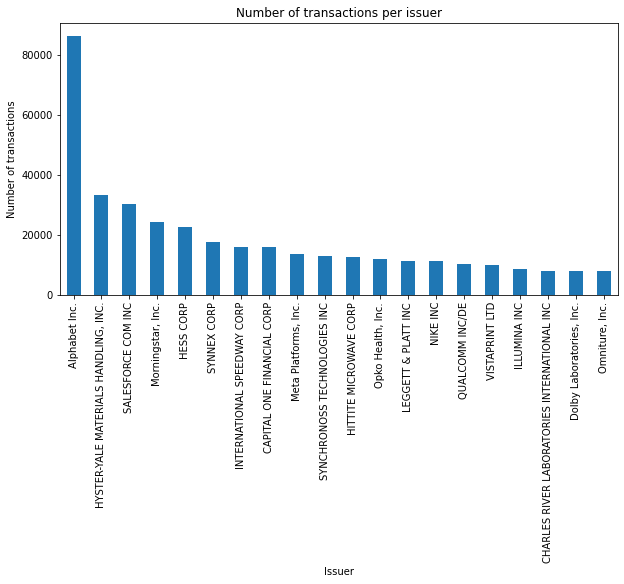

In [17]:
top_issuers = merged_df['ISSUERNAME'].value_counts().nlargest(20)
top_issuers.plot(kind='bar', figsize=(10,5))
plt.title('Number of transactions per issuer')
plt.xlabel('Issuer')
plt.ylabel('Number of transactions')
plt.show()

In [18]:
top_issuers = merged_df['ISSUERNAME'].value_counts().nlargest(50)
top_issuers

Alphabet Inc.                                   86314
HYSTER-YALE MATERIALS HANDLING, INC.            33289
SALESFORCE COM INC                              30436
Morningstar, Inc.                               24340
HESS CORP                                       22595
SYNNEX CORP                                     17673
INTERNATIONAL SPEEDWAY CORP                     15958
CAPITAL ONE FINANCIAL CORP                      15873
Meta Platforms, Inc.                            13627
SYNCHRONOSS TECHNOLOGIES INC                    12840
HITTITE MICROWAVE CORP                          12588
Opko Health, Inc.                               11999
LEGGETT & PLATT INC                             11228
NIKE INC                                        11131
QUALCOMM INC/DE                                 10429
VISTAPRINT LTD                                   9785
ILLUMINA INC                                     8727
CHARLES RIVER LABORATORIES INTERNATIONAL INC     7861
Dolby Laboratories, Inc.    

In [19]:
goog_trans_df = merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'GOOG']
goog_trans_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
3990,0001209191-17-046607,Alphabet Inc.,GOOG,2017-07-28,S,102.0
3991,0001209191-17-046607,Alphabet Inc.,GOOG,2017-07-28,S,423.0
4540,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,C,2625.0
4541,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,F,2866.0
4542,0001209191-17-050460,Alphabet Inc.,GOOG,2017-08-25,C,2625.0
...,...,...,...,...,...,...
6021278,0001209191-18-015242,Alphabet Inc.,GOOG,2018-02-26,C,2768.0
6021279,0001209191-18-015242,Alphabet Inc.,GOOG,2018-02-26,C,2901.0
6023176,0001209191-18-015216,Alphabet Inc.,GOOG,2018-03-01,S,37.0
6024415,0001209191-18-006551,Alphabet Inc.,GOOG,2018-02-01,S,38.0


In [20]:
meta_trans_df = merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'META']
meta_trans_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
2907,0001127602-17-026682,"Meta Platforms, Inc.",META,2017-08-29,S,410.0
2908,0001127602-17-026682,"Meta Platforms, Inc.",META,2017-08-29,S,267.0
2909,0001127602-17-026682,"Meta Platforms, Inc.",META,2017-08-29,S,73.0
3143,0001127602-17-026681,"Meta Platforms, Inc.",META,2017-08-25,S,25941.0
3144,0001127602-17-026681,"Meta Platforms, Inc.",META,2017-08-25,S,11506.0
...,...,...,...,...,...,...
6003590,0001127602-18-010260,"Meta Platforms, Inc.",META,2018-03-02,S,11072.0
6003591,0001127602-18-010260,"Meta Platforms, Inc.",META,2018-03-02,S,300.0
6003592,0001127602-18-010260,"Meta Platforms, Inc.",META,2018-03-02,S,11701.0
6003593,0001127602-18-010260,"Meta Platforms, Inc.",META,2018-03-02,S,10220.0


In [21]:
ilmn_trans_df = merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'ILMN']
ilmn_trans_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
1731,0001127602-17-026740,ILLUMINA INC,ILMN,2017-08-29,S,300.0
1732,0001127602-17-026740,ILLUMINA INC,ILMN,2017-08-29,S,4064.0
1733,0001127602-17-026740,ILLUMINA INC,ILMN,2017-08-28,S,1270.0
1734,0001127602-17-026740,ILLUMINA INC,ILMN,2017-08-28,S,1270.0
1735,0001127602-17-026740,ILLUMINA INC,ILMN,2017-08-29,M,20000.0
...,...,...,...,...,...,...
6013536,0001127602-18-000910,ILLUMINA INC,ILMN,2018-01-02,S,10537.0
6013537,0001127602-18-000910,ILLUMINA INC,ILMN,2018-01-02,S,9463.0
6016334,0001127602-18-009773,ILLUMINA INC,ILMN,2018-02-28,S,250.0
6018427,0001127602-18-000283,ILLUMINA INC,ILMN,2017-12-29,S,1250.0


In [22]:
zoom_trans_df = merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'ZM']
zoom_trans_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
123503,0001585521-22-000168,"Zoom Video Communications, Inc.",ZM,2022-07-26,S,1100.0
123504,0001585521-22-000168,"Zoom Video Communications, Inc.",ZM,2022-07-26,S,400.0
123505,0001585521-22-000168,"Zoom Video Communications, Inc.",ZM,2022-07-27,S,404.0
123506,0001585521-22-000168,"Zoom Video Communications, Inc.",ZM,2022-07-26,S,400.0
123507,0001585521-22-000168,"Zoom Video Communications, Inc.",ZM,2022-07-26,S,100.0
...,...,...,...,...,...,...
5833626,0001585521-21-000104,"Zoom Video Communications, Inc.",ZM,2021-05-03,S,200.0
5833627,0001585521-21-000104,"Zoom Video Communications, Inc.",ZM,2021-05-03,S,500.0
5833628,0001585521-21-000104,"Zoom Video Communications, Inc.",ZM,2021-05-03,S,184.0
5838304,0001585521-21-000098,"Zoom Video Communications, Inc.",ZM,2021-05-02,M,87.0


In [23]:
amzn_trans_df = merged_df[merged_df['ISSUERTRADINGSYMBOL'] == 'AMZN']
amzn_trans_df

,ACCESSION_NUMBER,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_DATE,TRANS_CODE,TRANS_SHARES
11168,0001018724-17-000122,AMAZON COM INC,AMZN,2017-08-21,S,100.0
11169,0001018724-17-000122,AMAZON COM INC,AMZN,2017-08-21,S,56.0
11170,0001018724-17-000122,AMAZON COM INC,AMZN,2017-08-21,S,503.0
11171,0001018724-17-000122,AMAZON COM INC,AMZN,2017-08-21,S,397.0
11172,0001018724-17-000122,AMAZON COM INC,AMZN,2017-08-21,S,400.0
...,...,...,...,...,...,...
6021853,0001018724-18-000047,AMAZON COM INC,AMZN,2018-02-27,S,300.0
6021854,0001018724-18-000047,AMAZON COM INC,AMZN,2018-02-27,S,100.0
6021855,0001018724-18-000047,AMAZON COM INC,AMZN,2018-02-27,S,100.0
6023254,0001018724-18-000048,AMAZON COM INC,AMZN,2018-02-28,S,150.0


In [24]:
features = ['TRANS_DATE', 'TRANS_CODE', 'TRANS_SHARES']

goog_trans_df = goog_trans_df[features]

goog_trans_df

,TRANS_DATE,TRANS_CODE,TRANS_SHARES
3990,2017-07-28,S,102.0
3991,2017-07-28,S,423.0
4540,2017-08-25,C,2625.0
4541,2017-08-25,F,2866.0
4542,2017-08-25,C,2625.0
...,...,...,...
6021278,2018-02-26,C,2768.0
6021279,2018-02-26,C,2901.0
6023176,2018-03-01,S,37.0
6024415,2018-02-01,S,38.0


In [25]:
meta_trans_df = meta_trans_df[features]
ilmn_trans_df = ilmn_trans_df[features]
zoom_trans_df = zoom_trans_df[features]
amzn_trans_df = amzn_trans_df[features]

goog_trans_df.to_csv('./data/goog_trans.csv', index=False)
meta_trans_df.to_csv('./data/meta_trans.csv', index=False)
ilmn_trans_df.to_csv('./data/ilmn_trans.csv', index=False)
zoom_trans_df.to_csv('./data/zoom_trans.csv', index=False)
amzn_trans_df.to_csv('./data/amzn_trans.csv', index=False)